In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-data-for-analysis/bankloan.csv


In [2]:
# Step 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure charts look neat
plt.style.use('ggplot')
sns.set_palette("viridis")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
import os

# Check input folder
os.listdir("/kaggle/input")


['loan-approval-data-for-analysis']

## 📘 Project Overview
This project aims to analyze and predict **which customers are likely to accept a personal loan** based on their demographic and financial profiles.  
By applying **data analysis and machine learning techniques**, we uncover key factors that influence loan acceptance and provide actionable business insights for better customer targeting.

---

In [4]:
# Load the dataset (edit path if name differs)
df = pd.read_csv('/kaggle/input/loan-approval-data-for-analysis/bankloan.csv')

# Preview first 5 rows
df.head()


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 🔹 Step 1: Project Setup
- Imported necessary Python libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`
- Loaded the dataset and verified structure, datatypes, and completeness

In [5]:
print("Shape of the dataset:", df.shape)
df.info()

Shape of the dataset: (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 🔹 Step 2: Data Understanding
- Explored dataset shape, missing values (none found)
- Checked feature statistics using `df.describe()`
- Observed class imbalance: ~10% customers accepted loans

In [6]:
# Step 2: Data Understanding

# Shape and columns
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())

# Data types
print("\n--- Data Types ---")
print(df.dtypes)

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# First 5 rows preview
df.head()


Shape of dataset: (5000, 14)

Column names: ['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']

--- Data Types ---
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

--- Missing Values ---
ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online             

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
# Quick stats for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# Target variable distribution
print(df['Personal.Loan'].value_counts())
print("\nPercentage distribution:")
print(df['Personal.Loan'].value_counts(normalize=True) * 100)


Personal.Loan
0    4520
1     480
Name: count, dtype: int64

Percentage distribution:
Personal.Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


### 🔹 Step 3: Data Cleaning & Preprocessing
- Dropped irrelevant columns: `ID`, `ZIP.Code`
- Checked for duplicates and outliers
- Verified datatypes and fixed any inconsistencies
- Dataset shape after cleaning: **(5000, 12)**

In [9]:
# Step 3: Data Cleaning & Preprocessing

# Drop columns that are not useful for analysis
df = df.drop(columns=['ID', 'ZIP.Code'], errors='ignore')

print("✅ Dropped columns: ID, ZIP.Code")


✅ Dropped columns: ID, ZIP.Code


In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed")
else:
    print("✅ No duplicates found")


Number of duplicate rows: 13
✅ Duplicates removed


In [11]:
# Check if any 'Experience' values are negative or unrealistic
print("\nExperience column summary:")
print(df['Experience'].describe())

# Replace negative experience values (if any) with median
neg_exp = df[df['Experience'] < 0].shape[0]
if neg_exp > 0:
    median_exp = df['Experience'].median()
    df.loc[df['Experience'] < 0, 'Experience'] = median_exp
    print(f"✅ Replaced {neg_exp} negative 'Experience' values with median ({median_exp})")
else:
    print("✅ No negative experience values found")



Experience column summary:
count    4987.000000
mean       20.114498
std        11.464902
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64
✅ Replaced 52 negative 'Experience' values with median (20.0)


In [12]:
# Verify data types
print("\n--- Data Types After Cleaning ---")
print(df.dtypes)



--- Data Types After Cleaning ---
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [13]:
print("\n✅ Final shape of dataset after cleaning:", df.shape)
df.head()



✅ Final shape of dataset after cleaning: (4987, 12)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### 🔹 Step 4: Exploratory Data Analysis (EDA)
- Visualized target distribution (Loan Accepted vs. Not Accepted)
- Analyzed numeric features (`Income`, `CCAvg`, `Mortgage`, `Age`)
- Explored categorical relationships:
  - **Higher Education** → more likely to accept loans
  - **Higher Income & CCAvg** → strong link to loan acceptance
- Created correlation heatmap to identify top predictors


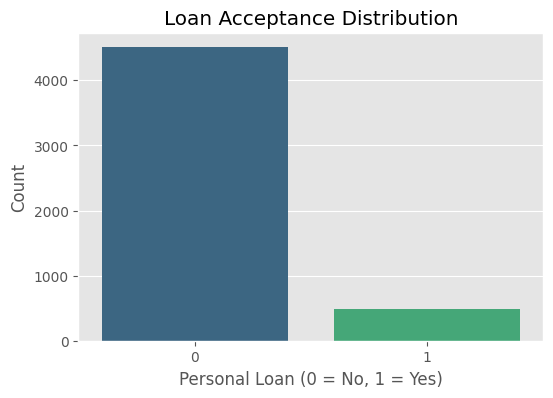

Percentage Distribution:
 Personal.Loan
0    90.374975
1     9.625025
Name: proportion, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Personal.Loan', data=df, palette='viridis')
plt.title('Loan Acceptance Distribution')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Percentage distribution
loan_percent = df['Personal.Loan'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", loan_percent)


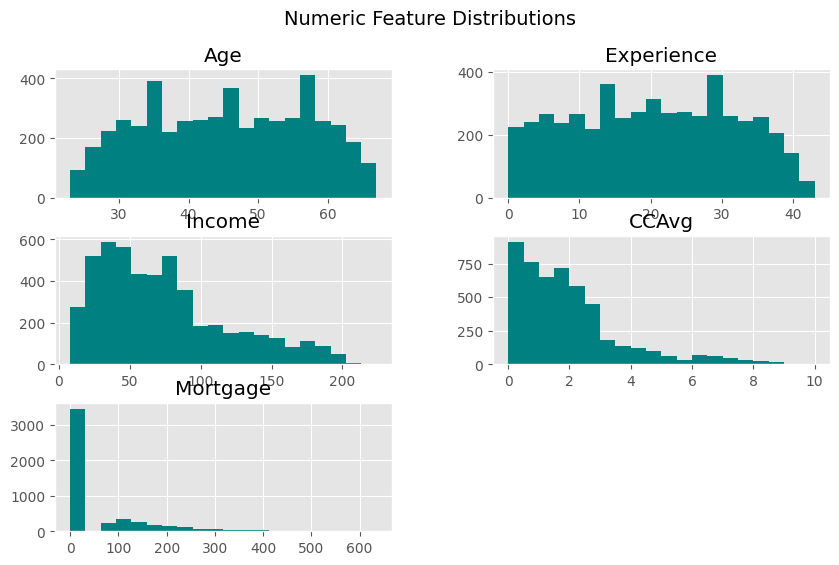

In [15]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

df[num_cols].hist(figsize=(10,6), bins=20, color='teal')
plt.suptitle('Numeric Feature Distributions', fontsize=14)
plt.show()


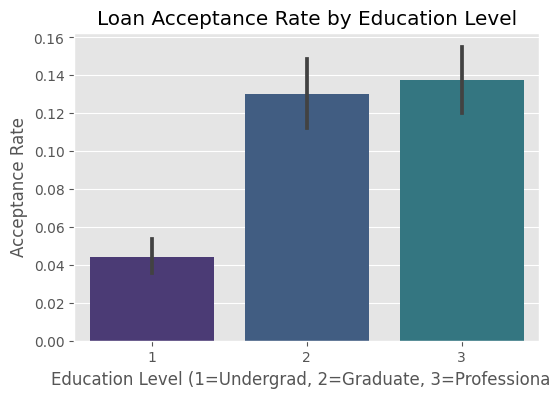

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='Education', y='Personal.Loan', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Loan Acceptance Rate by Education Level')
plt.xlabel('Education Level (1=Undergrad, 2=Graduate, 3=Professional)')
plt.ylabel('Acceptance Rate')
plt.show()


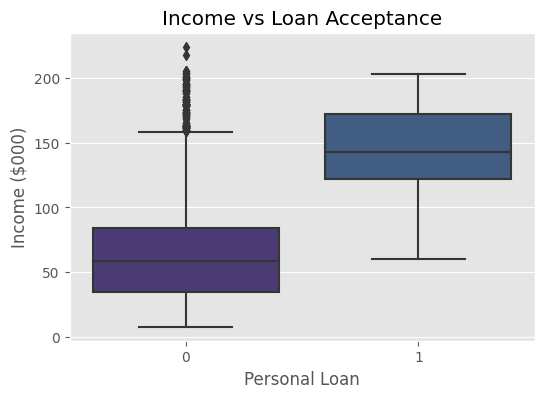

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Personal.Loan', y='Income', data=df)
plt.title('Income vs Loan Acceptance')
plt.xlabel('Personal Loan')
plt.ylabel('Income ($000)')
plt.show()


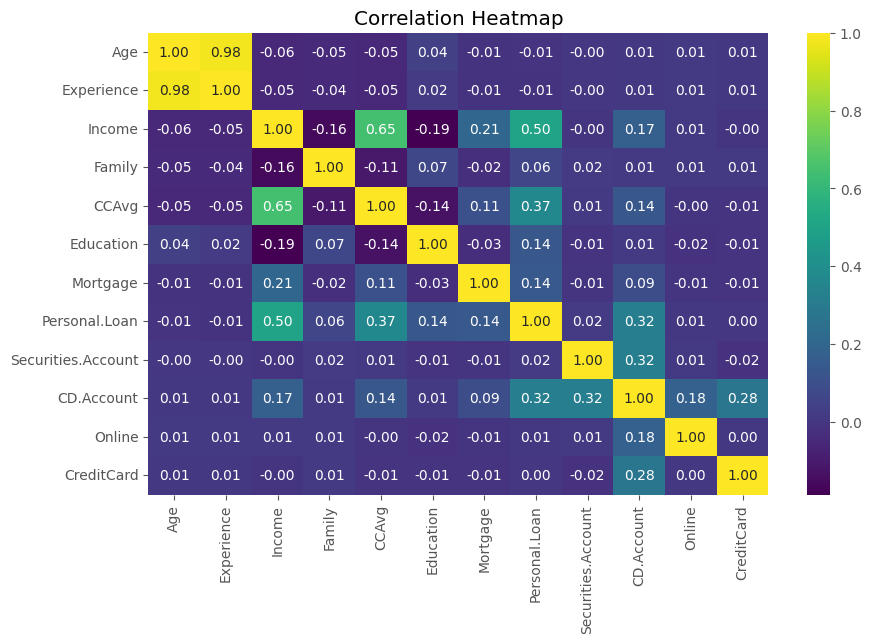

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


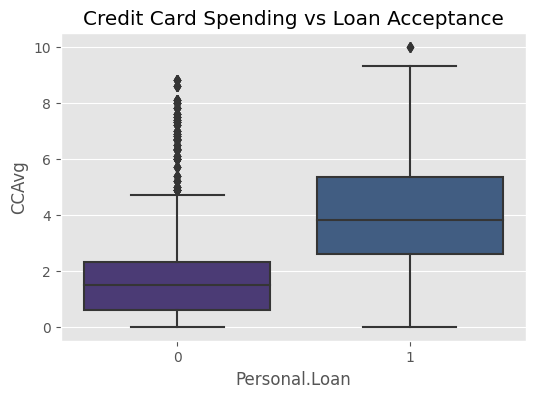

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Personal.Loan', y='CCAvg', data=df)
plt.title('Credit Card Spending vs Loan Acceptance')
plt.show()


### 🔹 Step 5: Feature Engineering
Created new derived features:
- `Income_per_Family` = Income / Family  
- `Has_Mortgage` = 1 if Mortgage > 0 else 0  
- `Income_per_Exp` = Income / (Experience + 1)

Scaled numeric columns using `StandardScaler` for model consistency.

In [20]:
# Step 5: Feature Engineering

# 1. Income per family member
df['Income_per_Family'] = df['Income'] / df['Family']

# 2. Has mortgage or not (binary flag)
df['Has_Mortgage'] = np.where(df['Mortgage'] > 0, 1, 0)

# 3. Average income per experience year (stability indicator)
df['Income_per_Exp'] = df['Income'] / (df['Experience'] + 1)  # +1 to avoid divide by zero

print("✅ New features created successfully!")
df[['Income', 'Family', 'Income_per_Family', 'Has_Mortgage', 'Income_per_Exp']].head()


✅ New features created successfully!


,Income,Family,Income_per_Family,Has_Mortgage,Income_per_Exp
0,49,4,12.250000,0,24.5000
1,34,3,11.333333,0,1.7000
2,11,1,11.000000,0,0.6875
3,100,1,100.000000,0,10.0000
4,45,4,11.250000,0,5.0000


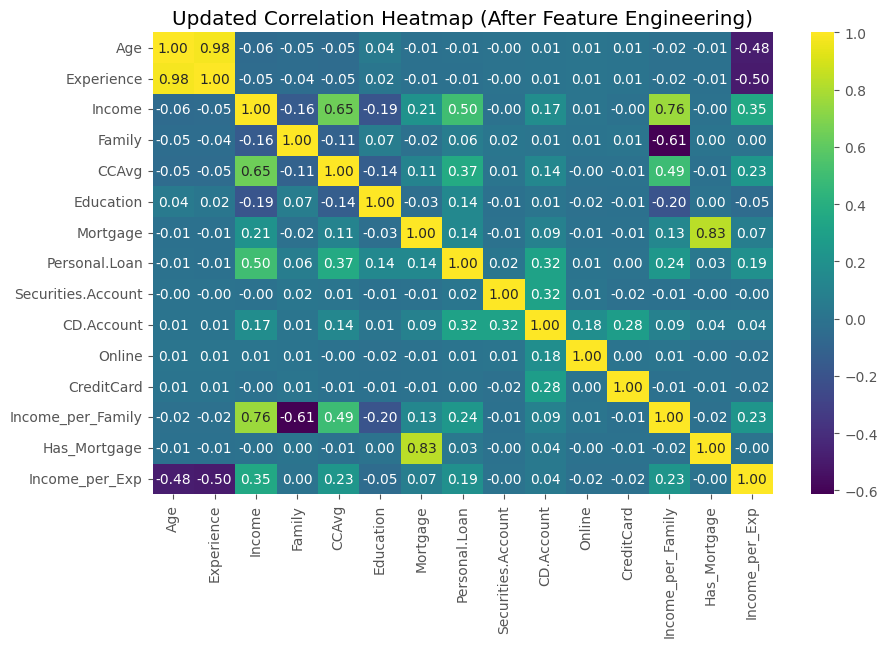

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Updated Correlation Heatmap (After Feature Engineering)')
plt.show()


### 🔹 Step 6: Model Building & Evaluation
Trained and compared two classification models:
1. **Logistic Regression**
2. **Random Forest Classifier**

In [22]:
from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
num_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 
                'Income_per_Family', 'Income_per_Exp']

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print("✅ Numeric features scaled successfully!")


✅ Numeric features scaled successfully!


In [23]:
print("Final shape:", df.shape)
print("\nMissing values check:\n", df.isnull().sum())
df.head()


Final shape: (4987, 15)

Missing values check:
 Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
Income_per_Family     0
Has_Mortgage          0
Income_per_Exp        0
dtype: int64


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard,Income_per_Family,Has_Mortgage,Income_per_Exp
0,-1.775590,-1.719242,-0.538983,4,-0.194796,1,-0.556471,0,1,0,0,0,-0.763696,0,1.486003
1,-0.030341,-0.118961,-0.864659,3,-0.251983,1,-0.556471,0,1,0,0,0,-0.786905,0,-0.408531
2,-0.553916,-0.474579,-1.364028,1,-0.537918,1,-0.556471,0,0,0,0,0,-0.795344,0,-0.492664
3,-0.902966,-1.008006,0.568314,1,0.434261,2,-0.556471,0,0,0,0,0,1.457959,0,0.281146
4,-0.902966,-1.096910,-0.625830,4,-0.537918,2,-0.556471,0,0,0,0,1,-0.789014,0,-0.134322


In [24]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split done!")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


✅ Data split done!
Training set: (3989, 14)
Testing set: (998, 14)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Create and train model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

# Evaluation
print("🔹 Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))


🔹 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       902
           1       0.46      0.92      0.61        96

    accuracy                           0.89       998
   macro avg       0.72      0.90      0.77       998
weighted avg       0.94      0.89      0.90       998

ROC AUC: 0.9616939209164819


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create and train model
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("\n🔹 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))



🔹 Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       902
           1       0.99      0.95      0.97        96

    accuracy                           0.99       998
   macro avg       0.99      0.97      0.98       998
weighted avg       0.99      0.99      0.99       998

ROC AUC: 0.9991223207686624


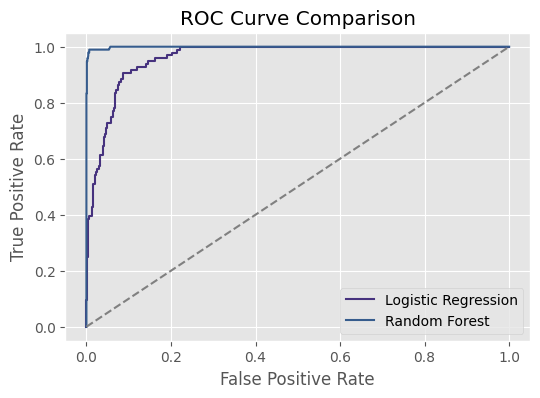

In [27]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


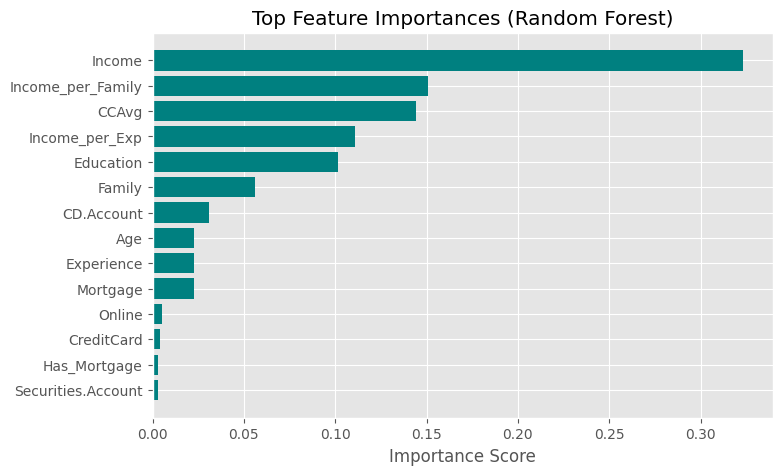

,Feature,Importance
2,Income,0.323284
11,Income_per_Family,0.150608
4,CCAvg,0.144000
13,Income_per_Exp,0.110712
5,Education,0.101750
3,Family,0.056026
8,CD.Account,0.030902
0,Age,0.022809
1,Experience,0.022575
6,Mortgage,0.022509


In [28]:
# Feature Importance (Random Forest)
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance['Feature'], importance['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Top Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

importance.head(10)
